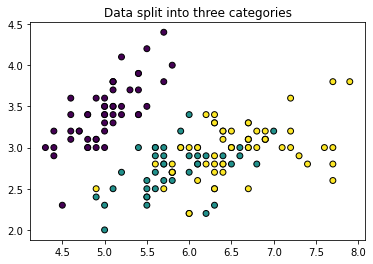

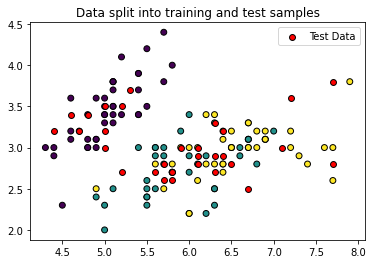

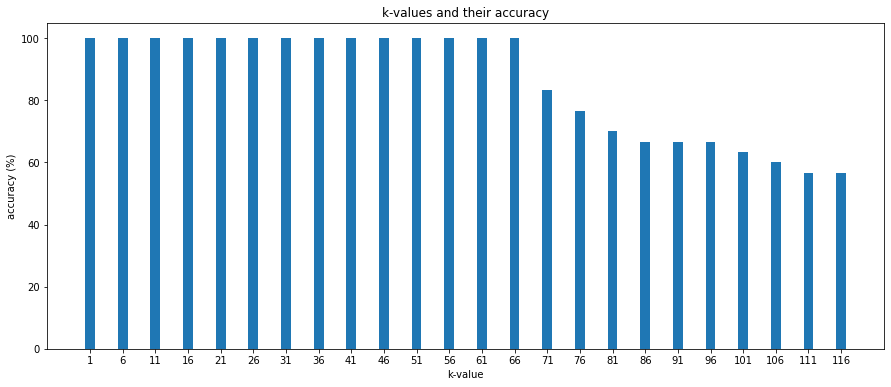

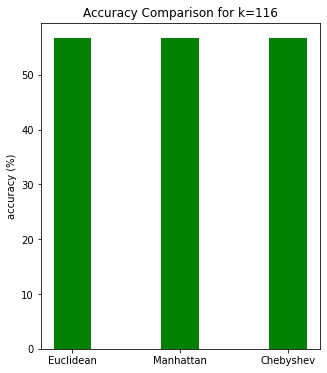

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split


def euclidean_distance(x1, x2):
    """
    :param x1: point 1
    :param x2: point 2
    :return: euclidean distance of two given points x1,x2
    """
    return np.sqrt(np.sum((x1 - x2) ** 2))


def manhattan_distance(x1, x2):
    """
    :param x1: point 1
    :param x2: point 2
    :return: manhattan distance of two given points x1,x2
    """
    return np.sum(np.abs(x1 - x2))


def chebyshev_distance(x1, x2):
    """
    :param x1:
    :param x2:
    :return: chebyshev distance of two given points x1,x2
    """
    return np.max(np.abs(x1 - x2))


def plot_acc_bar(acc_list, bins):
    """
    plots accuracy of k values represented in bars
    """
    plt.figure(figsize=(15, 6))
    plt.title("k-values and their accuracy")
    plt.ylabel("accuracy (%)")
    plt.xlabel("k-value")
    plt.bar(np.arange(1, bins, 5), acc_list, width=1.5, tick_label=np.arange(1, bins, 5))
    plt.show()


def plot_acc_hist(acc_list):
    """
    plots distribution of accuracy for all possible k values
    :param acc_list: list of accuracies of the different distance functions
    """
    plt.figure(figsize=(7, 5))
    plt.title("distribution of accuracy for all possible k values")
    plt.xlabel("accuracy (%)")
    plt.ylabel("k value")
    plt.hist(acc_list, 100, width=1.5)
    plt.show()


class KNN:
    def __init__(self, k):
        """
        constructor
        """
        self.k = k
        self.data = self.category = self.data_train = self.data_test = self.category_train = self.category_test = None

    def fit(self):
        """
        load dataset and split into training and test samples
        """
        dataset = datasets.load_iris()
        self.data, self.category = dataset.data, dataset.target
        self.data_train, self.data_test, self.category_train, self.category_test = train_test_split(self.data,
                                                                                                    self.category,
                                                                                                    test_size=0.2,
                                                                                                    random_state=1234)

    def knn(self, dist_func = euclidean_distance):
        """
        calls all other functions for the knn algorithm
        """

        # get data
        self.fit()

        # use list comprehension to predict each test sample's category
        predictions = [self.predict(test_point, dist_func) for test_point in self.data_test]

        # get accuracy of predictions
        self.accuracy(predictions)

        return predictions

    def predict(self, test_point, dist_function):
        """
        predicts the category of the training point based on the k nearest neighbors to it
        :param dist_function: the function that is used to calculate the distance
        :param data_train: data points used to predict the training points category
        :param category_train: categories of the data points
        :param test_point: point the categories will be predicted for
        :return: the category prediction
        """

        # calculate all euclidean distances to the train point
        distances = []
        for i in range(len(self.data_train)):
            dist = dist_function(self.data_train[i], test_point)
            distances.append([dist, i])

        # convert to numpy array and sort from lowest to highest distance
        sort_index = np.argsort(np.array(distances), axis=0)

        # get only the k nearest values
        sort_index_k = sort_index[0:self.k]

        # get corresponding data categories
        data_category = np.take(self.category_train, sort_index_k)

        # look for most common category
        prediction = np.bincount(data_category[:, 0]).argmax()

        return prediction

    def accuracy(self, predictions):
        """
        calculates accuracy of predictions by checking if the predictions equals the categories of the test samples
        :param predictions:
        :return:
        """

        # count the number of correct predictions
        correct = [i for i in range(len(predictions)) if predictions[i] == self.category_test[i]]

        # calculate accuracy of predictions
        acc = len(correct) / len(self.data_test) * 100

        return acc

    def plot_data(self):
        """
        plots dataset where each category has a different color; test samples are represented in red
        """

        # plot whole dataset as scatter plot
        fig, ax = plt.subplots()
        ax.scatter(self.data[:, 0], self.data[:, 1], c=self.category, edgecolor='black', s=35)
        plt.title('Data split into three categories')
        plt.show()

        # plot dataset seperated into train and test samples; train samples keep their category color
        fig2, ax = plt.subplots()
        ax.scatter(self.data_train[:, 0], self.data_train[:, 1], c=self.category_train, edgecolor='black', s=35)
        p = ax.scatter(self.data_test[:, 0], self.data_test[:, 1], c='red', edgecolor='black', s=35)
        plt.title('Data split into training and test samples')
        ax.legend([p], ['Test Data'])
        plt.show()

    def compare_k(self):
        """
        plots all possible values for k in steps of 5 in a histogram to compare which k values provide the best accuracy
        for the given dataset
        """

        acc_list = []
        for i in range(1, len(self.data_train)+1, 5):
            # set k value to i
            self.k = i

            # predict category and calculate accuracy for k value
            predictions = self.knn()
            acc = self.accuracy(predictions)
            acc_list.append(acc)

        # plot histogram to compare accuracy levels with different k values
        plot_acc_bar(acc_list, len(self.data_train)-1)
        # plot_acc_hist(acc_list)

    def compare_distance_function(self):
        """
        plots accuracy of k values represented in bars
        """

        # get accuracy of the different distance functions
        acc_euclidean = self.accuracy(self.knn())
        acc_manhattan = self.accuracy(self.knn(manhattan_distance))
        acc_chebyshev = self.accuracy(self.knn(chebyshev_distance))

        # save accuracies in list
        acc_list = [acc_euclidean, acc_manhattan, acc_chebyshev]

        # values for bar plot
        ind = np.arange(3)
        width = 0.35

        # plot comparison represented in bars
        plt.figure(figsize=(5, 6))
        plt.bar(ind, acc_list, width, color='green', tick_label=('Euclidean', 'Manhattan', 'Chebyshev'))
        plt.title(f"Accuracy Comparison for k={self.k}")
        plt.ylabel("accuracy (%)")
        plt.show()


if __name__ == '__main__':
    # create instance of class
    knn = KNN(5)

    # call function to start algorithm
    knn.knn()

    # plot data samples
    knn.plot_data()

    # compare different k values
    knn.compare_k()

    # compare different distance functions
    knn.compare_distance_function()


